<a href="https://colab.research.google.com/github/rfsilveira/geoprocessamento/blob/UFABC/UFABC_AtividadeII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analise Espacial de dados eleitorais utilizando Geopandas:  O 1º turno em Belém (PA)**

Alunos:

Endel Muller Dalat de Sousa (Alto Paraíso) e
Rosinaldo Fonseca da Silveira (Peruíbe)


# Introdução

O geoprocessamento é uma ferramenta indispensável para a compreensão de fenômenos sociais, políticos e econômicos, permitindo uma visualização mais detalhada das dinâmicas territoriais. No contexto eleitoral, a utilização de técnicas de análise espacial proporciona insights valiosos sobre padrões de votação, distribuição geográfica do eleitorado e fatores contextuais que influenciam os resultados em diferentes regiões, sendo amplamente explorada em reportagens jornalísticas e estudos acadêmicos sobre o tema (Junckes et al, 2021).
Este trabalho realizará uma análise espacial de dados eleitorais do 1º turno das eleições municipais de 2024 na cidade de Belém (PA). A proposta deste estudo inclui a coleta e o tratamento de dados geográficos e eleitorais, a criação de mapas coropléticos e a aplicação de técnicas de análise espacial para identificar a distribuição dos votos para prefeito no ano de 2024 ao longo das zonas eleitorais da cidade avaliada. Por meio dessa abordagem, espera-se contribuir para a compreensão das especificidades do comportamento eleitoral em cada contexto urbano e reforçar o uso do geoprocessamento como uma metodologia robusta para análises eleitorais.





# Objetivos

Analisar espacialmente a distribuição dos votos para prefeito no município de Belém (PA) nas eleições de 2024, utilizando a biblioteca Geopandas, com o intuito de identificar padrões geográficos e compreender as dinâmicas eleitorais.

Objetivos Específicos

1.	Coletar e organizar os dados eleitorais e geográficos necessários para a análise do município de Belém (PA), garantindo a padronização e consistência das informações.
2.	Gerar mapas coropléticos que representem a distribuição dos votos por zona eleitoral, permitindo uma visualização clara e acessível dos resultados eleitorais em ambas as cidades.
3.	Avaliar as potencialidades e limitações da biblioteca Geopandas na realização de análises eleitorais espaciais.



# Materiais e Métodos

Neste exercício, foram utilizados dados eleitorais e geoespaciais provenientes de fontes oficiais, além de ferramentas computacionais específicas para análise espacial. Os dados referentes aos votos para prefeito nas eleições de 2024 foram obtidos junto ao Tribunal Superior Eleitoral (TSE), abrangendo informações organizadas por zonas e seções eleitorais. Os dados geográficos necessários foram obtidos por meio da Companhia de Desenvolvimento e Administração da Área Metropolitana de Belém (CODEM).

O processamento e a análise dos dados foram realizados por meio do Google Colab, com o auxílio da biblioteca Geopandas. O procedimento metodológico teve início com a coleta e organização dos dados eleitorais e geoespaciais, assegurando sua padronização e consistência. Foi realizada a integração entre os dois tipos de dados, com vistas a garantir a correspondência exata entre as unidades territoriais de análise, como bairros ou zonas eleitorais. Após essa etapa, os dados foram tratados para eliminar inconsistências, corrigir discrepâncias e uniformizar os sistemas de projeção cartográfica utilizados.

A análise espacial foi conduzida por meio da criação de mapas coropléticos, que representaram a distribuição dos votos por zona eleitoral ao longo da cidade. Esses mapas utilizaram escalas cromáticas para evidenciar variações na intensidade do apoio eleitoral aos diferentes candidatos. Paralelamente, foram aplicadas técnicas de estatística espacial para identificar padrões de concentração de votos.

# Desemvolvimento
# Carregamento de Dados

In [10]:
# rodar para deixar as células da largura da janela do navegador
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [11]:
# imports
import sys,os
import glob
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as clrs
from scipy.spatial import ConvexHull

sep = ';' # separador do arquivo CSV
dec = ',' # separador de decimais
enc = 'latin1' # codificação dos caracteres

### Leitura de Boletins de Urna turno 1

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
f = '/content/drive/MyDrive/files/bweb_1t_PA_091020241636/bweb_1t_PA_091020241636.csv'
df_bu = pd.read_csv(f, sep=sep, encoding=enc, decimal=dec)

# Preparação dos Dados

In [14]:
len(df_bu)

1540111

In [15]:
df_bu.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_SECOES_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEI_BIOM_SEM_HABILITACAO,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,...,0B358478,2024-09-27 10:11:00,13 - 10,#NULO#,2024-10-06 08:00:01,2024-10-06 17:02:51,23,2024-10-06 17:06:32,-1,-1
1,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,...,8518FA6B,2024-09-26 17:30:00,13 - 112,#NULO#,2024-10-06 08:00:01,2024-10-06 17:00:49,16,2024-10-06 17:03:06,-1,-1
2,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,...,8518FA6B,2024-09-26 17:30:00,13 - 112,#NULO#,2024-10-06 08:00:01,2024-10-06 17:00:49,16,2024-10-06 17:03:06,-1,-1
3,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,...,8518FA6B,2024-09-26 11:16:00,13 - 2,#NULO#,2024-10-06 08:00:01,2024-10-06 17:02:26,16,2024-10-06 17:04:29,-1,-1
4,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,...,04060374,2024-09-28 11:30:00,13 - 384,#NULO#,2024-10-06 08:00:01,2024-10-06 17:04:31,18,2024-10-06 17:06:27,-1,-1


In [16]:
cols = list(df_bu.columns)

In [17]:
df_bu.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_PLEITO', 'DT_PLEITO', 'NR_TURNO', 'CD_ELEICAO',
       'DS_ELEICAO', 'SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA',
       'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_CARGO_PERGUNTA',
       'DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DT_BU_RECEBIDO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES',
       'CD_TIPO_URNA', 'DS_TIPO_URNA', 'CD_TIPO_VOTAVEL', 'DS_TIPO_VOTAVEL',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA',
       'CD_CARGA_1_URNA_EFETIVADA', 'CD_CARGA_2_URNA_EFETIVADA',
       'CD_FLASHCARD_URNA_EFETIVADA', 'DT_CARGA_URNA_EFETIVADA',
       'DS_CARGO_PERGUNTA_SECAO', 'DS_SECOES_AGREGADAS', 'DT_ABERTURA',
       'DT_ENCERRAMENTO', 'QT_ELEI_BIOM_SEM_HABILITACAO', 'DT_EMISSAO_BU',
       'NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA'],
      dtype='object')

### Apenas Município de Belém

In [18]:
list(df_bu['NM_MUNICIPIO'].unique())

['SALINÓPOLIS',
 'CURUÇÁ',
 'CAMETÁ',
 'BARCARENA',
 'BELÉM',
 'CASTANHAL',
 'IPIXUNA DO PARÁ',
 'BONITO',
 'CACHOEIRA DO ARARI',
 'GURUPÁ',
 'SANTARÉM',
 'NOVO REPARTIMENTO',
 'ITAITUBA',
 'SÃO SEBASTIÃO DA BOA VISTA',
 'PONTA DE PEDRAS',
 'TAILÂNDIA',
 'AUGUSTO CORRÊA',
 'PARAUAPEBAS',
 'ABAETETUBA',
 'BAIÃO',
 'PORTO DE MOZ',
 'BELTERRA',
 'ANANINDEUA',
 'IGARAPÉ-MIRI',
 'RONDON DO PARÁ',
 'XINGUARA',
 'SÃO GERALDO DO ARAGUAIA',
 'CAPITÃO POÇO',
 'VITÓRIA DO XINGU',
 'MARITUBA',
 'SALVATERRA',
 'MAGALHÃES BARATA',
 'AVEIRO',
 'URUARÁ',
 'BENEVIDES',
 'ACARÁ',
 'GOIANÉSIA DO PARÁ',
 'PRAINHA',
 'IGARAPÉ-AÇU',
 'DOM ELISEU',
 'PIÇARRA',
 'OEIRAS DO PARÁ',
 'SANTA MARIA DO PARÁ',
 'AFUÁ',
 'BUJARU',
 'CAPANEMA',
 'SÃO DOMINGOS DO CAPIM',
 'CANAÃ DOS CARAJÁS',
 'MUANÁ',
 'PARAGOMINAS',
 'BREVES',
 'AURORA DO PARÁ',
 'BRAGANÇA',
 'ORIXIMINÁ',
 'SOURE',
 'SENADOR JOSÉ PORFÍRIO',
 'PALESTINA DO PARÁ',
 'SANTA MARIA DAS BARREIRAS',
 'NOVO PROGRESSO',
 'JACAREACANGA',
 'MOJUÍ DOS CAMPOS',
 '

In [19]:
mun = 'BELÉM'
df_bu_bel = df_bu[df_bu['NM_MUNICIPIO'] == mun].copy()
len(df_bu_bel)

354996

In [20]:
df_bu_bel.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_SECOES_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEI_BIOM_SEM_HABILITACAO,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
6,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,...,98C4573A,2024-09-26 12:19:00,13 - 57,#NULO#,2024-10-06 08:00:01,2024-10-06 17:07:14,11,2024-10-06 17:10:05,-1,-1
13,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,...,7BEE023B,2024-09-29 10:56:00,13 - 312,#NULO#,2024-10-06 08:00:01,2024-10-06 17:01:28,22,2024-10-06 17:03:15,-1,-1
24,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,...,5778F457,2024-09-28 08:57:00,13 - 403,#NULO#,2024-10-06 08:00:01,2024-10-06 17:00:47,7,2024-10-06 17:02:03,-1,-1
25,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,...,08FD9C91,2024-09-29 12:49:00,13 - 221,#NULO#,2024-10-06 08:00:01,2024-10-06 17:01:58,8,2024-10-06 17:04:13,-1,-1
30,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,...,5778F457,2024-09-28 08:21:00,13 - 308,#NULO#,2024-10-06 08:00:01,2024-10-06 17:01:46,12,2024-10-06 17:03:21,-1,-1


### Apenas Prefeito

In [21]:
list(df_bu_bel['DS_CARGO_PERGUNTA'].unique())

['Vereador', 'Prefeito']

In [22]:
cargo = 'Prefeito'
df_bu_bel_pref = df_bu_bel[df_bu_bel['DS_CARGO_PERGUNTA'] == cargo].copy()
len(df_bu_bel_pref)

26544

Lista **Zonas** Prefeito

In [23]:
list(df_bu_bel_pref['NR_ZONA'].unique())

[97, 96, 95, 98, 1, 28, 29, 30, 73, 76]

Lista Seções Prefeito

In [24]:
list(df_bu_bel_pref['NR_SECAO'].unique())

[65,
 363,
 146,
 325,
 224,
 329,
 113,
 8,
 29,
 6,
 11,
 46,
 35,
 18,
 16,
 34,
 5,
 68,
 61,
 42,
 64,
 20,
 145,
 90,
 659,
 147,
 56,
 243,
 756,
 324,
 256,
 350,
 514,
 500,
 335,
 405,
 412,
 279,
 555,
 269,
 15,
 442,
 12,
 298,
 44,
 357,
 389,
 51,
 4,
 284,
 574,
 156,
 271,
 513,
 570,
 201,
 317,
 598,
 486,
 3,
 431,
 346,
 291,
 169,
 376,
 307,
 60,
 318,
 252,
 319,
 141,
 180,
 525,
 240,
 311,
 336,
 546,
 778,
 314,
 197,
 140,
 777,
 237,
 593,
 734,
 878,
 179,
 397,
 568,
 499,
 229,
 582,
 94,
 242,
 17,
 295,
 195,
 605,
 303,
 265,
 258,
 38,
 453,
 23,
 531,
 251,
 199,
 152,
 437,
 244,
 109,
 292,
 282,
 641,
 10,
 382,
 206,
 728,
 276,
 132,
 527,
 552,
 394,
 681,
 209,
 492,
 362,
 417,
 312,
 262,
 101,
 459,
 104,
 472,
 174,
 580,
 556,
 561,
 83,
 441,
 684,
 309,
 393,
 96,
 111,
 133,
 567,
 699,
 579,
 120,
 771,
 606,
 178,
 729,
 173,
 161,
 205,
 523,
 226,
 351,
 366,
 299,
 528,
 688,
 297,
 353,
 306,
 48,
 735,
 738,
 858,
 300,
 572,


### Pivô da tabela

In [25]:
# fazer pivot por numero da seção não funciona, pois tem o mesmo número nas outras zonas
pd.pivot_table(df_bu_bel_pref, index=['NR_SECAO'], values='QT_VOTOS', columns=['NM_VOTAVEL'], aggfunc='min', fill_value=0)

NM_VOTAVEL,Branco,DELEGADO EDER MAURO,DELEGADO EGUCHI,EDMILSON RODRIGUES,IGOR,JEFFERSON LIMA,Nulo,RAQUEL BRÍCIO,THIAGO ARAÚJO,WELL,ÍTALO ABATI
NR_SECAO,,,,,,,,,,,
1,2,76,3,15,88,8,2,1,13,1,1
2,3,70,1,15,107,10,6,1,17,1,1
3,2,65,2,14,83,3,7,1,11,1,1
4,2,79,1,13,97,4,5,1,19,1,2
5,4,74,1,19,103,3,6,1,17,1,1
...,...,...,...,...,...,...,...,...,...,...,...
880,3,32,1,7,92,5,7,0,14,0,0
881,1,21,1,7,29,3,2,0,1,0,0
883,0,12,0,4,34,5,1,0,3,0,0


In [26]:
# coluna com junção de zona e seção
df_bu_bel_pref['zonasec'] = df_bu_bel_pref['NR_ZONA'].map(str) +'_'+ df_bu_bel_pref['NR_SECAO'].map(str)

In [27]:
df_bu_bel_pref['zonasec'].unique()

array(['97_65', '96_363', '95_146', ..., '30_874', '30_870', '30_868'],
      dtype=object)

In [28]:
df_bu_bel_pref_pvt = pd.pivot_table(df_bu_bel_pref, index=['zonasec','NR_ZONA'], values='QT_VOTOS', columns=['NM_VOTAVEL'], aggfunc='min', fill_value=0).reset_index()
df_bu_bel_pref_pvt

NM_VOTAVEL,zonasec,NR_ZONA,Branco,DELEGADO EDER MAURO,DELEGADO EGUCHI,EDMILSON RODRIGUES,IGOR,JEFFERSON LIMA,Nulo,RAQUEL BRÍCIO,THIAGO ARAÚJO,WELL,ÍTALO ABATI
0,1_11,1,5,89,1,51,123,5,11,3,21,0,0
1,1_12,1,8,101,2,36,130,5,11,1,21,0,2
2,1_16,1,5,135,3,38,127,5,14,2,20,1,6
3,1_17,1,2,121,1,44,136,4,11,2,37,1,3
4,1_18,1,4,116,1,26,111,9,11,2,25,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,98_56,98,7,113,0,25,153,26,9,0,31,0,0
2819,98_6,98,8,95,0,30,97,6,11,2,24,0,1
2820,98_7,98,4,95,3,29,99,9,13,3,30,0,1
2821,98_8,98,6,85,1,33,120,12,10,1,22,1,1


In [29]:
df_bu_bel_pref_pvt.sum()

,0
NM_VOTAVEL,
zonasec,1_111_121_161_171_181_191_201_211_221_231_251_...
NR_ZONA,177984
Branco,16307
DELEGADO EDER MAURO,252455
DELEGADO EGUCHI,2918
EDMILSON RODRIGUES,78401
IGOR,359904
JEFFERSON LIMA,36354
Nulo,25373


In [30]:
df_bu_bel_pref_pvt.select_dtypes(include=np.number).sum().sort_values(ascending=False)

,0
NM_VOTAVEL,
IGOR,359904
DELEGADO EDER MAURO,252455
NR_ZONA,177984
EDMILSON RODRIGUES,78401
THIAGO ARAÚJO,62271
JEFFERSON LIMA,36354
Nulo,25373
Branco,16307
ÍTALO ABATI,4028


In [31]:
df_bu_bel_pref_pvt.groupby('NR_ZONA').sum()

NM_VOTAVEL,zonasec,Branco,DELEGADO EDER MAURO,DELEGADO EGUCHI,EDMILSON RODRIGUES,IGOR,JEFFERSON LIMA,Nulo,RAQUEL BRÍCIO,THIAGO ARAÚJO,WELL,ÍTALO ABATI
NR_ZONA,,,,,,,,,,,,
1,1_111_121_161_171_181_191_201_211_221_231_251_...,1171,18732,218,9543,26797,1974,2014,356,5567,160,403
28,28_128_1028_10028_10128_10228_10328_10428_1052...,1625,23149,286,6936,34932,4689,2541,285,6347,165,376
29,29_10029_10129_10229_10329_10429_10529_10629_1...,1516,21759,216,9164,36756,3712,2088,360,6636,225,299
30,30_12730_12830_12930_13030_13130_13230_13330_1...,1819,28022,238,6440,48724,4660,2696,182,5289,118,171
73,73_21173_21273_21373_21473_21573_21673_21773_2...,2019,34719,302,6866,43798,4173,2884,414,7332,259,449
76,76_26876_26976_27076_27176_27276_27376_27476_2...,1314,21734,291,8044,26385,1891,2382,420,5196,225,569
95,95_195_1095_10095_10195_10295_10395_10495_1059...,1644,24776,548,8931,29921,3530,2617,381,6243,233,591
96,96_10096_10196_10296_10396_10496_10596_10696_1...,1550,21859,282,9842,36545,3426,2654,361,6602,256,403
97,97_197_1097_1197_1297_1397_1497_1597_1697_1797...,2064,30743,249,5878,46022,5292,2831,313,6843,208,333


In [32]:
# 1 - retirar 'zonasec' - df_bu_sp_pref_pvt.drop(columns='zonasec')
# 2 - agrupar por zona e somar - .groupby('NR_ZONA').sum()
# 3 - resetar o index para ter 'NR_ZONA' como coluna de novo - .reset_index()
df_bu_bel_pref_pvt_sumsec = df_bu_bel_pref_pvt.drop(columns='zonasec').groupby('NR_ZONA').sum().reset_index()

In [33]:
df_bu_bel_pref_pvt_sumsec

NM_VOTAVEL,NR_ZONA,Branco,DELEGADO EDER MAURO,DELEGADO EGUCHI,EDMILSON RODRIGUES,IGOR,JEFFERSON LIMA,Nulo,RAQUEL BRÍCIO,THIAGO ARAÚJO,WELL,ÍTALO ABATI
0,1,1171,18732,218,9543,26797,1974,2014,356,5567,160,403
1,28,1625,23149,286,6936,34932,4689,2541,285,6347,165,376
2,29,1516,21759,216,9164,36756,3712,2088,360,6636,225,299
3,30,1819,28022,238,6440,48724,4660,2696,182,5289,118,171
4,73,2019,34719,302,6866,43798,4173,2884,414,7332,259,449
5,76,1314,21734,291,8044,26385,1891,2382,420,5196,225,569
6,95,1644,24776,548,8931,29921,3530,2617,381,6243,233,591
7,96,1550,21859,282,9842,36545,3426,2654,361,6602,256,403
8,97,2064,30743,249,5878,46022,5292,2831,313,6843,208,333
9,98,1585,26962,288,6757,30024,3007,2666,378,6216,204,434


In [34]:
df_bu_bel_pref_pvt_sumsec_sorted = df_bu_bel_pref_pvt_sumsec.apply(
    lambda col: col.sort_values(ascending=False).reset_index(drop=True)
)

print(df_bu_bel_pref_pvt_sumsec_sorted)

NM_VOTAVEL  NR_ZONA  Branco  DELEGADO EDER MAURO  DELEGADO EGUCHI  \
0                98    2064                34719              548   
1                97    2019                30743              302   
2                96    1819                28022              291   
3                95    1644                26962              288   
4                76    1625                24776              286   
5                73    1585                23149              282   
6                30    1550                21859              249   
7                29    1516                21759              238   
8                28    1314                21734              218   
9                 1    1171                18732              216   

NM_VOTAVEL  EDMILSON RODRIGUES   IGOR  JEFFERSON LIMA  Nulo  RAQUEL BRÍCIO  \
0                         9842  48724            5292  2884            420   
1                         9543  46022            4689  2831            414   
2     

In [35]:
df_bu_bel_pref_pvt_sumsec.columns

Index(['NR_ZONA', 'Branco', 'DELEGADO EDER MAURO', 'DELEGADO EGUCHI',
       'EDMILSON RODRIGUES', 'IGOR', 'JEFFERSON LIMA', 'Nulo', 'RAQUEL BRÍCIO',
       'THIAGO ARAÚJO', 'WELL', 'ÍTALO ABATI'],
      dtype='object', name='NM_VOTAVEL')

### Zonas Eleitorais

In [36]:
zonas = list(df_bu_bel_pref_pvt_sumsec['NR_ZONA'].unique())
np.sort(zonas)

array([ 1, 28, 29, 30, 73, 76, 95, 96, 97, 98])

In [37]:
len(zonas)

10

### Mapa de Zonas Eleitorais

In [40]:
# geopackage
gpkg_zonas_bel = '/content/drive/MyDrive/files/bairrosBelemIBGE2022.gpkg'
gdf_zonas_bel = gpd.read_file(gpkg_zonas_bel)

In [41]:
gdf_zonas_bel

,id,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,...,CD_BAIRRO,NM_BAIRRO,CD_RGINT,NM_RGINT,CD_RGI,NM_RGI,CD_CONCURB,NM_CONCURB,ZE_TREPA2017,geometry
0,37,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,1501402009,Marco,1501,Belém,150001,Belém,1501402,Belém/PA,76,"POLYGON ((783676.606 9841412.668, 783683.769 9..."
1,38,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,1501402013,Reduto,1501,Belém,150001,Belém,1501402,Belém/PA,95,"POLYGON ((779482.496 9840037.143, 779484.063 9..."
2,39,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,1501402001,Batista Campos,1501,Belém,150001,Belém,1501402,Belém/PA,1,"POLYGON ((779477.329 9837799.279, 779392.669 9..."
3,40,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,1501402003,Cidade Velha,1501,Belém,150001,Belém,1501402,Belém/PA,1,"POLYGON ((778206.929 9837770.918, 778151.851 9..."
4,41,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,1501402006,Guamá,1501,Belém,150001,Belém,1501402,Belém/PA,29,"POLYGON ((782353.388 9836483.988, 782104.665 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,104,1,Norte,15,Pará,1501402,Belém,150140275,Sacramenta,15014027500,...,1501402014,Sacramenta,1501,Belém,150001,Belém,1501402,Belém/PA,28,"POLYGON ((780902.526 9844172.254, 781195.189 9..."
68,105,1,Norte,15,Pará,1501402,Belém,150140275,Sacramenta,15014027500,...,1501402022,Maracangalha,1501,Belém,150001,Belém,1501402,Belém/PA,28,"POLYGON ((780858.362 9844262.638, 780801.285 9..."
69,106,1,Norte,15,Pará,1501402,Belém,150140275,Sacramenta,15014027500,...,1501402012,Pedreira,1501,Belém,150001,Belém,1501402,Belém/PA,95,"POLYGON ((782554.989 9842994.564, 782571.539 9..."
70,107,1,Norte,15,Pará,1501402,Belém,150140275,Sacramenta,15014027500,...,1501402021,Barreiro,1501,Belém,150001,Belém,1501402,Belém/PA,28,"POLYGON ((780338.923 9843633.712, 780184.552 9..."


<Axes: >

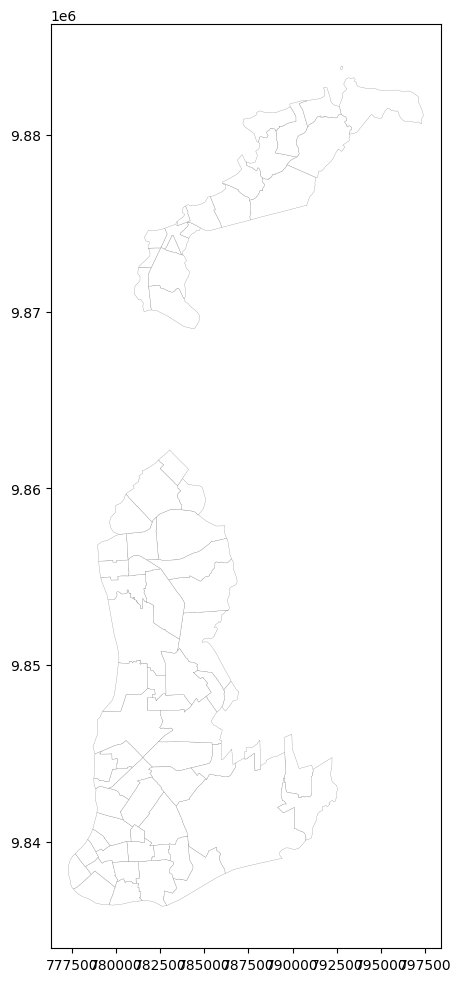

In [42]:
gdf_zonas_bel.plot(figsize=(12,12), color='white', edgecolor='grey', linewidth=0.2)

In [43]:
gdf_zonas_bel.columns

Index(['id', 'CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN', 'NM_MUN',
       'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'NM_SUBDIST', 'CD_BAIRRO',
       'NM_BAIRRO', 'CD_RGINT', 'NM_RGINT', 'CD_RGI', 'NM_RGI', 'CD_CONCURB',
       'NM_CONCURB', 'ZE_TREPA2017', 'geometry'],
      dtype='object')

In [44]:
len(gdf_zonas_bel)

72

In [45]:
#.dropna() usado para filtrar os dois bairros não zoneados do mapa de 2017
zonas_mapa = list(gdf_zonas_bel['ZE_TREPA2017'].dropna().unique())
np.sort(zonas_mapa)

array(['1', '28', '29', '30', '73', '76', '95', '96', '97', '98'],
      dtype='<U2')

In [46]:
np.sort(zonas) # do arquivo de boletim de urna

array([ 1, 28, 29, 30, 73, 76, 95, 96, 97, 98])

<Axes: >

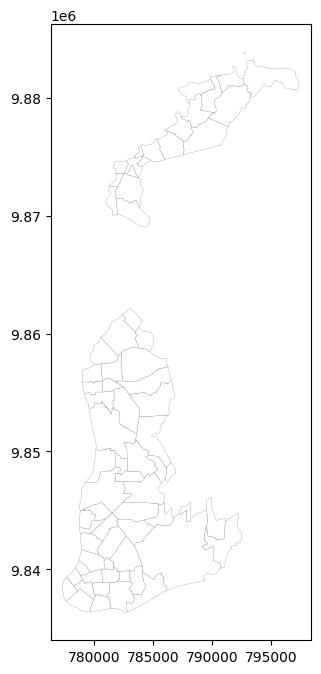

In [47]:
gdf_zonas_bel.plot(figsize=(6,8), color='white', edgecolor='grey', linewidth=0.2)

#### Junção dos dataframes

In [48]:
df_bu_bel_pref_pvt_sumsec.columns

Index(['NR_ZONA', 'Branco', 'DELEGADO EDER MAURO', 'DELEGADO EGUCHI',
       'EDMILSON RODRIGUES', 'IGOR', 'JEFFERSON LIMA', 'Nulo', 'RAQUEL BRÍCIO',
       'THIAGO ARAÚJO', 'WELL', 'ÍTALO ABATI'],
      dtype='object', name='NM_VOTAVEL')

In [49]:
gdf_zonas_bel.columns

Index(['id', 'CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN', 'NM_MUN',
       'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'NM_SUBDIST', 'CD_BAIRRO',
       'NM_BAIRRO', 'CD_RGINT', 'NM_RGINT', 'CD_RGI', 'NM_RGI', 'CD_CONCURB',
       'NM_CONCURB', 'ZE_TREPA2017', 'geometry'],
      dtype='object')

In [50]:
# renomear coluna para merge
gdf_zonas_bel = gdf_zonas_bel.rename(columns={"ZE_TREPA2017": "NR_ZONA"})
gdf_zonas_bel.head()

,id,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,...,CD_BAIRRO,NM_BAIRRO,CD_RGINT,NM_RGINT,CD_RGI,NM_RGI,CD_CONCURB,NM_CONCURB,NR_ZONA,geometry
0,37,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,1501402009,Marco,1501,Belém,150001,Belém,1501402,Belém/PA,76,"POLYGON ((783676.606 9841412.668, 783683.769 9..."
1,38,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,1501402013,Reduto,1501,Belém,150001,Belém,1501402,Belém/PA,95,"POLYGON ((779482.496 9840037.143, 779484.063 9..."
2,39,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,1501402001,Batista Campos,1501,Belém,150001,Belém,1501402,Belém/PA,1,"POLYGON ((779477.329 9837799.279, 779392.669 9..."
3,40,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,1501402003,Cidade Velha,1501,Belém,150001,Belém,1501402,Belém/PA,1,"POLYGON ((778206.929 9837770.918, 778151.851 9..."
4,41,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,1501402006,Guamá,1501,Belém,150001,Belém,1501402,Belém/PA,29,"POLYGON ((782353.388 9836483.988, 782104.665 9..."


In [51]:
gdf_zonas_bel['NR_ZONA'] = gdf_zonas_bel['NR_ZONA'].fillna(0).astype(int)  # Convert to integer if possible
df_bu_bel_pref_pvt_sumsec['NR_ZONA'] = df_bu_bel_pref_pvt_sumsec['NR_ZONA'].fillna(0).astype(int) # Convert to integer if possible


In [52]:
gdf_merge = gdf_zonas_bel.merge(df_bu_bel_pref_pvt_sumsec, on='NR_ZONA')
gdf_merge.head()

,id,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,...,DELEGADO EDER MAURO,DELEGADO EGUCHI,EDMILSON RODRIGUES,IGOR,JEFFERSON LIMA,Nulo,RAQUEL BRÍCIO,THIAGO ARAÚJO,WELL,ÍTALO ABATI
0,37,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,21734,291,8044,26385,1891,2382,420,5196,225,569
1,38,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,24776,548,8931,29921,3530,2617,381,6243,233,591
2,39,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,18732,218,9543,26797,1974,2014,356,5567,160,403
3,40,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,18732,218,9543,26797,1974,2014,356,5567,160,403
4,41,1,Norte,15,Pará,1501402,Belém,150140205,Belém,15014020500,...,21759,216,9164,36756,3712,2088,360,6636,225,299


In [53]:
gdf_merge.columns

Index(['id', 'CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN', 'NM_MUN',
       'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'NM_SUBDIST', 'CD_BAIRRO',
       'NM_BAIRRO', 'CD_RGINT', 'NM_RGINT', 'CD_RGI', 'NM_RGI', 'CD_CONCURB',
       'NM_CONCURB', 'NR_ZONA', 'geometry', 'Branco', 'DELEGADO EDER MAURO',
       'DELEGADO EGUCHI', 'EDMILSON RODRIGUES', 'IGOR', 'JEFFERSON LIMA',
       'Nulo', 'RAQUEL BRÍCIO', 'THIAGO ARAÚJO', 'WELL', 'ÍTALO ABATI'],
      dtype='object')

### Candidatos

In [54]:
df_bu_bel_pref.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_PLEITO', 'DT_PLEITO', 'NR_TURNO', 'CD_ELEICAO',
       'DS_ELEICAO', 'SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA',
       'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_CARGO_PERGUNTA',
       'DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DT_BU_RECEBIDO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES',
       'CD_TIPO_URNA', 'DS_TIPO_URNA', 'CD_TIPO_VOTAVEL', 'DS_TIPO_VOTAVEL',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA',
       'CD_CARGA_1_URNA_EFETIVADA', 'CD_CARGA_2_URNA_EFETIVADA',
       'CD_FLASHCARD_URNA_EFETIVADA', 'DT_CARGA_URNA_EFETIVADA',
       'DS_CARGO_PERGUNTA_SECAO', 'DS_SECOES_AGREGADAS', 'DT_ABERTURA',
       'DT_ENCERRAMENTO', 'QT_ELEI_BIOM_SEM_HABILITACAO', 'DT_EMISSAO_BU',
       'NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA', 'zonasec'],
      dtype='object')

In [55]:
list(df_bu_bel_pref['NM_VOTAVEL'].unique())

['RAQUEL BRÍCIO',
 'Branco',
 'Nulo',
 'DELEGADO EDER MAURO',
 'DELEGADO EGUCHI',
 'WELL',
 'THIAGO ARAÚJO',
 'EDMILSON RODRIGUES',
 'JEFFERSON LIMA',
 'IGOR',
 'ÍTALO ABATI']

In [56]:
# candidatos
em = 'DELEGADO EDER MAURO'
eg = 'DELEGADO EGUCHI'
we = 'WELL'
th = 'THIAGO ARAÚJO'
ed = 'EDMILSON RODRIGUES'
jf = 'JEFFERSON LIMA'
ig = 'IGOR'
it = 'ÍTALO ABATI'
rb = 'RAQUEL BRÍCIO'

### Plots

<Axes: >

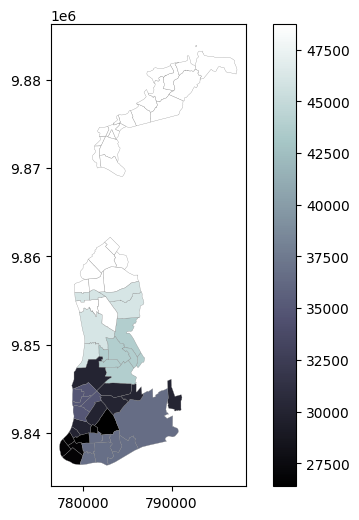

In [57]:
gdf_merge.plot(column=ig, figsize=(7,6), legend=True, cmap='bone', edgecolor='grey', linewidth=0.2)

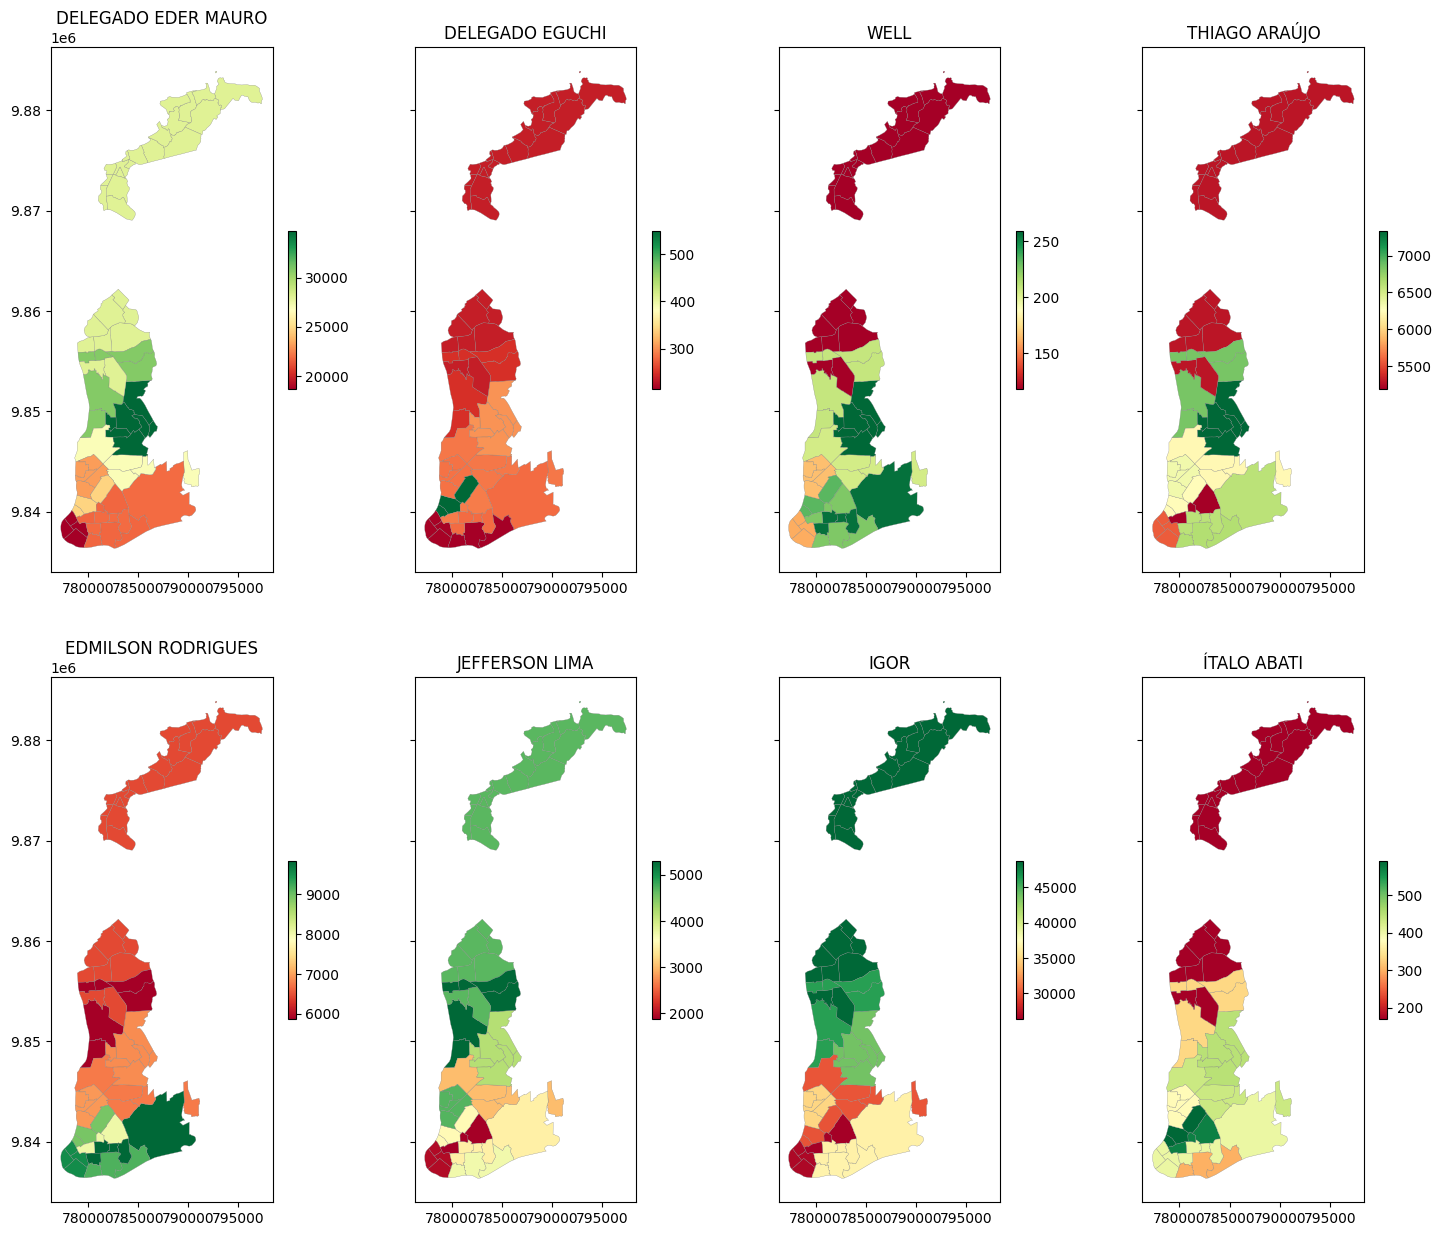

In [62]:
votaveis = [em, eg, we, th, ed, jf, ig, it]

fig, axs = plt.subplots(2, 4, sharey=True, figsize=(18,15))

for index, vot in enumerate(votaveis):
    ax = axs[index // 4, index % 4]

    # gdf.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.2)
    gdf_merge.plot(ax=ax, column=vot, figsize=(9,8), legend=True, cmap='RdYlGn', edgecolor='grey', linewidth=0.2, legend_kwds={'shrink':0.3})
    ax.set_title(vot)

### Três candidatos mais bem colocados

(0.0, 50000.0)

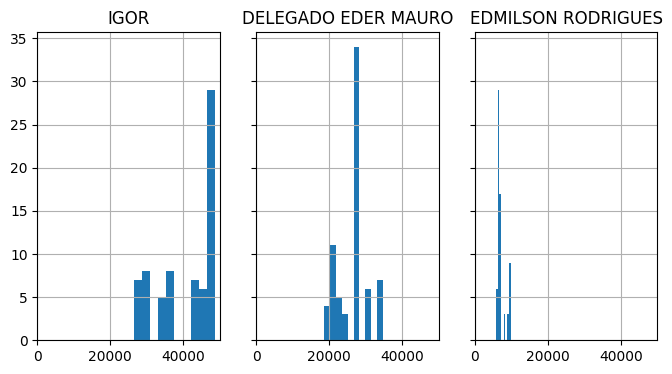

In [59]:
# histograms

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(8,4))

ax = axs[0]
vot = ig
gdf_merge[vot].hist(ax=ax)
ax.set_title(vot)
ax.set_xlim((0,50000))

ax = axs[1]
vot = em
gdf_merge[vot].hist(ax=ax)
ax.set_title(vot)
ax.set_xlim((0,50000))

ax = axs[2]
vot = ed
gdf_merge[vot].hist(ax=ax)
ax.set_title(vot)
ax.set_xlim((0,50000))

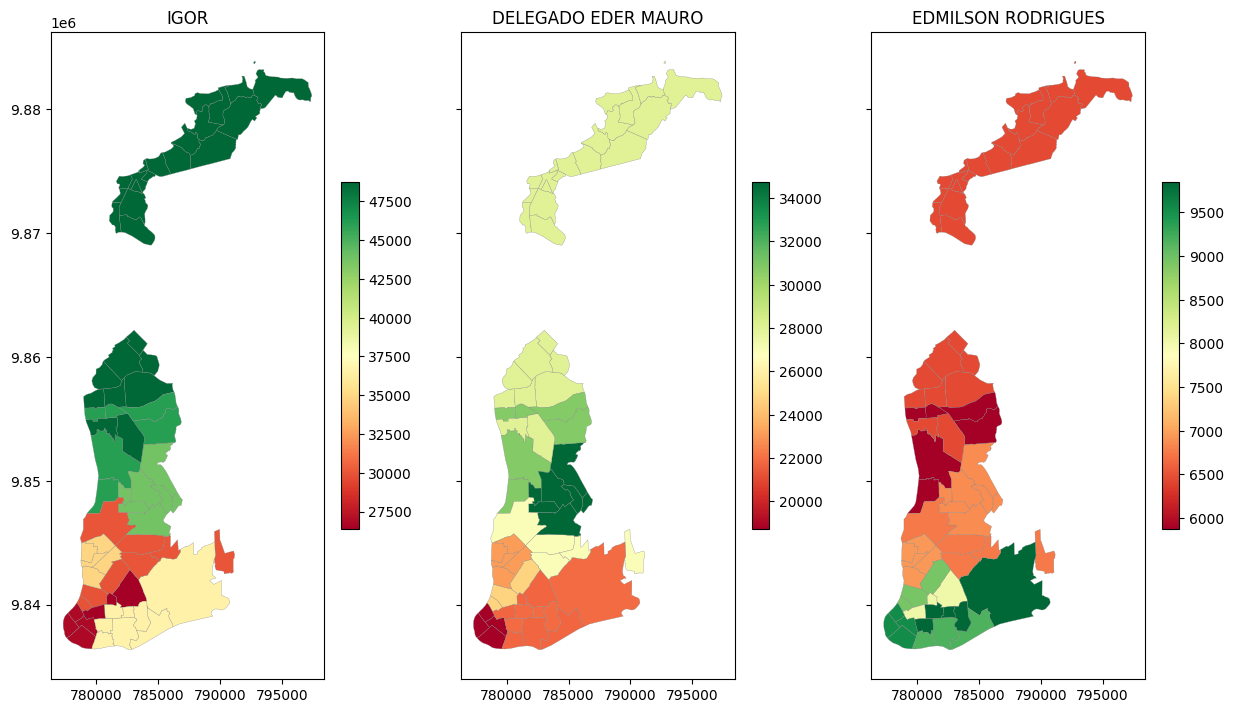

In [63]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15,15))
norm = clrs.CenteredNorm(vcenter=50, halfrange=50)

ax = axs[0]
vot = ig
gdf_merge.plot(ax=ax, column=vot, legend=True, cmap='RdYlGn', edgecolor='gray', linewidth=0.2, legend_kwds={'shrink':0.3})#, norm=norm)
ax.set_title(vot)

ax = axs[1]
vot = em
gdf_merge.plot(ax=ax, column=vot, legend=True, cmap='RdYlGn', edgecolor='grey', linewidth=0.2, legend_kwds={'shrink':0.3})#, norm=norm)
ax.set_title(vot);

ax = axs[2]
vot = ed
gdf_merge.plot(ax=ax, column=vot, legend=True, cmap='RdYlGn', edgecolor='grey', linewidth=0.2, legend_kwds={'shrink':0.3})#, norm=norm)
ax.set_title(vot);


### grafico todas as urnas

In [64]:
# df pivô
df_bu_bel_pref_pvt

NM_VOTAVEL,zonasec,NR_ZONA,Branco,DELEGADO EDER MAURO,DELEGADO EGUCHI,EDMILSON RODRIGUES,IGOR,JEFFERSON LIMA,Nulo,RAQUEL BRÍCIO,THIAGO ARAÚJO,WELL,ÍTALO ABATI
0,1_11,1,5,89,1,51,123,5,11,3,21,0,0
1,1_12,1,8,101,2,36,130,5,11,1,21,0,2
2,1_16,1,5,135,3,38,127,5,14,2,20,1,6
3,1_17,1,2,121,1,44,136,4,11,2,37,1,3
4,1_18,1,4,116,1,26,111,9,11,2,25,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,98_56,98,7,113,0,25,153,26,9,0,31,0,0
2819,98_6,98,8,95,0,30,97,6,11,2,24,0,1
2820,98_7,98,4,95,3,29,99,9,13,3,30,0,1
2821,98_8,98,6,85,1,33,120,12,10,1,22,1,1


In [65]:
# df pivô
df_bu_bel_pref_pvt2 = df_bu_bel_pref_pvt.drop(columns='zonasec')

In [66]:
#Máximo de votos unicos em urna
df_bu_bel_pref_pvt2.max()

,0
NM_VOTAVEL,
NR_ZONA,98
Branco,16
DELEGADO EDER MAURO,155
DELEGADO EGUCHI,18
EDMILSON RODRIGUES,70
IGOR,246
JEFFERSON LIMA,40
Nulo,26
RAQUEL BRÍCIO,8


In [67]:
#mínimo de votos unicos em urna
df_bu_bel_pref_pvt2.min()

,0
NM_VOTAVEL,
NR_ZONA,1
Branco,0
DELEGADO EDER MAURO,5
DELEGADO EGUCHI,0
EDMILSON RODRIGUES,1
IGOR,17
JEFFERSON LIMA,0
Nulo,0
RAQUEL BRÍCIO,0


In [68]:
#média de votos
df_bu_bel_pref_pvt2.mean()

,0
NM_VOTAVEL,
NR_ZONA,63.047821
Branco,5.776479
DELEGADO EDER MAURO,89.427914
DELEGADO EGUCHI,1.033652
EDMILSON RODRIGUES,27.772228
IGOR,127.489904
JEFFERSON LIMA,12.877790
Nulo,8.987956
RAQUEL BRÍCIO,1.222104


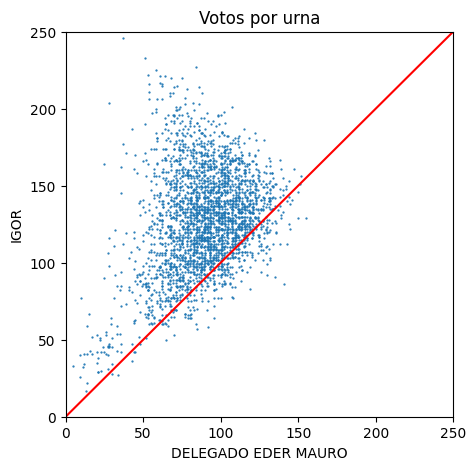

In [69]:
# grafico todas as urnas
#IGOR VS EDER MAURO
max_vt = 250
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(df_bu_bel_pref_pvt[em], df_bu_bel_pref_pvt[ig], 'o', ms=0.6)
#ax.plot((max_vt,0),(0,max_vt),c='grey')
ax.plot((0,max_vt),(0,max_vt),c='red')

ax.set_title('Votos por urna')
ax.set_xlim(0,max_vt)
ax.set_ylim(0,max_vt)
ax.set_xlabel(em)
ax.set_ylabel(ig);

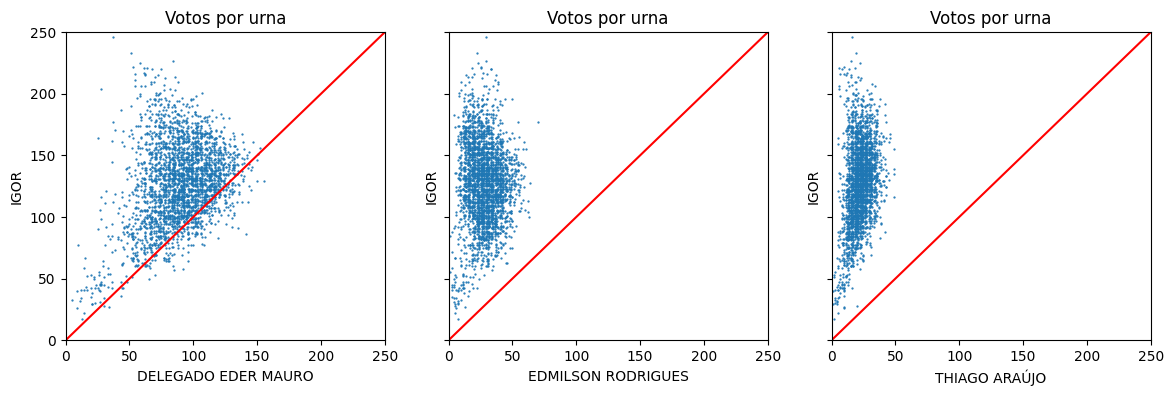

In [70]:
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(14,4))

max_vt = 250

ax=axs[0]
c1 = em
c2 = ig
ax.plot(df_bu_bel_pref_pvt[c1], df_bu_bel_pref_pvt[c2], 'o', ms=0.6)
ax.plot((0,max_vt),(0,max_vt),c='red')
ax.set_title('Votos por urna')
ax.set_xlim(0,max_vt)
ax.set_ylim(0,max_vt)
ax.set_xlabel(c1)
ax.set_ylabel(c2);


ax=axs[1]
c1 = ed
c2 = ig
ax.plot(df_bu_bel_pref_pvt[c1], df_bu_bel_pref_pvt[c2], 'o', ms=0.6)
ax.plot((0,max_vt),(0,max_vt),c='red')
ax.set_title('Votos por urna')
ax.set_xlim(0,max_vt)
ax.set_ylim(0,max_vt)
ax.set_xlabel(c1)
ax.set_ylabel(c2);


ax=axs[2]
c1 = th
c2 = ig
ax.plot(df_bu_bel_pref_pvt[c1], df_bu_bel_pref_pvt[c2], 'o', ms=0.6)
ax.plot((0,max_vt),(0,max_vt),c='red')
ax.set_title('Votos por urna')
ax.set_xlim(0,max_vt)
ax.set_ylim(0,max_vt)
ax.set_xlabel(c1)
ax.set_ylabel(c2);



In [71]:
import seaborn as sns

<Axes: xlabel='DELEGADO EDER MAURO', ylabel='IGOR'>

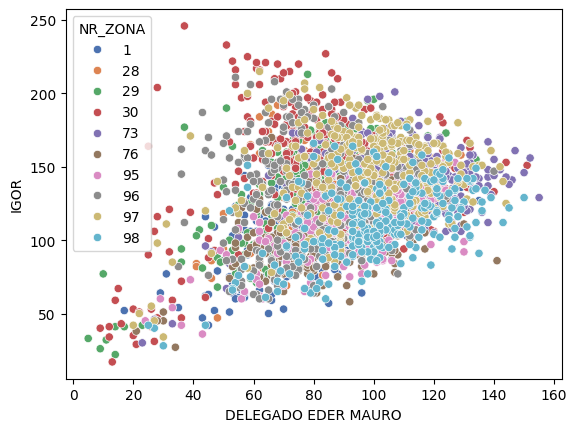

In [72]:
sns.scatterplot(x=em, y=ig, data=df_bu_bel_pref_pvt, hue='NR_ZONA', palette='deep')

In [73]:
from scipy.spatial import ConvexHull

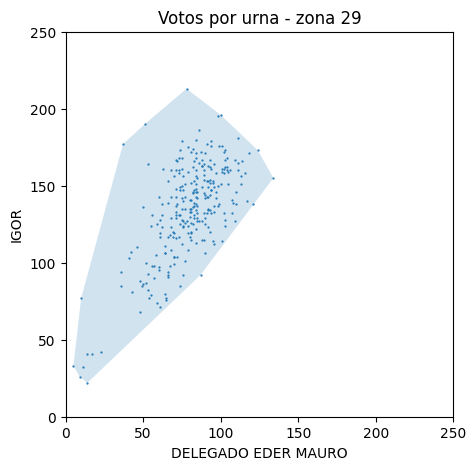

In [74]:
k = 29 # zona
c1 = em
c2 = ig

fig, ax = plt.subplots(figsize=(5,5))

df_tmp = df_bu_bel_pref_pvt[['NR_ZONA',c1,c2]]
df_pts = df_tmp[df_tmp['NR_ZONA'] == k]
pts = df_pts[[c1,c2]]
hull = ConvexHull(pts)
plt.plot(pts[c1], pts[c2], 'o', ms=0.6)
ax.fill(pts.iloc[hull.vertices][c1], pts.iloc[hull.vertices][c2], alpha=0.2)

ax.set_title(f'Votos por urna - zona {k}')
ax.set_xlim(0,max_vt)
ax.set_ylim(0,max_vt)
ax.set_xlabel(c1)
ax.set_ylabel(c2);

In [75]:
def plt_chull_zonas (ax,c1,c2):
    for k in zonas:
        df_tmp = df_bu_bel_pref_pvt[['NR_ZONA',c1,c2]]
        df_pts = df_tmp[df_tmp['NR_ZONA'] == k]
        pts = df_pts[[c1,c2]]
        hull = ConvexHull(pts)
        #plt.plot(pts[c1], pts[c2], 'o', ms=0.6)
        ax.fill(pts.iloc[hull.vertices][c1], pts.iloc[hull.vertices][c2], alpha=0.2)
        ax.set_title('Votos por urna e zona (hull)')
        ax.set_xlim(0,max_vt)
        ax.set_ylim(0,max_vt)
        ax.set_xlabel(c1)
        ax.set_ylabel(c2);

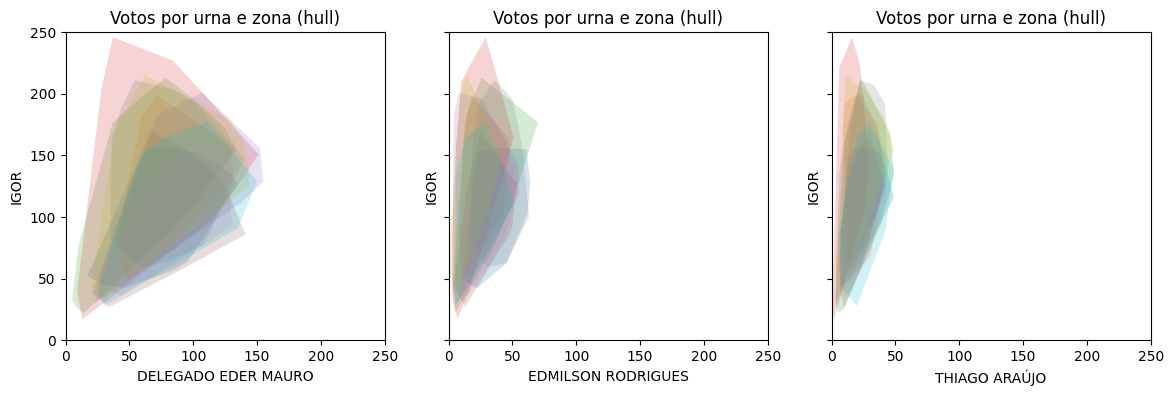

In [76]:
zonas = df_bu_bel_pref_pvt['NR_ZONA'].unique()

fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(14,4))
plt_chull_zonas (ax=axs[0], c1=em, c2=ig)
plt_chull_zonas (ax=axs[1], c1=ed, c2=ig)
plt_chull_zonas (ax=axs[2], c1=th, c2=ig)



# Considerações Finais

A utilização do Pandas e do Geopandas, aliada ao Google Colab, configura um conjunto poderoso para análises de dados geoespaciais, sendo especialmente útil para aplicações como análise eleitoral, permitindo a geração de insights políticos valiosos.

Entretanto, a versão gratuita do Google Colab apresentou limitações que impediram a realização de análises para cidades maiores, como São Paulo. Para realizar análises mais complexas nessas localidades, seria necessário realizar o upgrade para a versão paga do serviço.

Adicionalmente, alguns dados geoespaciais não estavam disponíveis em formatos práticos para a cidade de Belém. Por exemplo, informações sobre os bairros estavam disponíveis apenas em formato PDF, mas foi possível extrair essas informações por meio do site do IBGE.

Outro desafio foi encontrado em relação às zonas eleitorais, cujos dados são disponibilizados pelo site do TRE-PA apenas como imagens, com a versão mais recente datando de 2017. Não há informações georreferenciadas disponíveis para associar as seções eleitorais aos bairros, o que teria permitido uma análise mais precisa.

Como sugestões para trabalhos futuros, recomenda-se solicitar, via Lei de Acesso à Informação, dados atualizados sobre as zonas e seções eleitorais. Esses dados possibilitariam resultados mais detalhados e análises ainda mais robustas.

# Referências Bibliográficas

COMPANHIA DE DESENVOLVIMENTO E ADMINISTRAÇÃO DA ÁREA METROPOLITANA DE BELÉM. Mapas: bairros de Belém. Disponível em: https://codem.belem.pa.gov.br/mapas/bairros-de-belem/. Acesso em: dez. 2024.

GROHMANN, C. H. Eleições Brasil. São Paulo: IAG-USP, 2024. Disponível em: https://github.com/CarlosGrohmann/eleicoes_brasil. Acesso em: dez. 2024.

INSTITUTO BRASILEIRO DE GEOGRAFIA E ESTATÍSTICA. Downloads Geociências: Malhas de setores censitários e divisões intramunicipais – Censo 2022: bairros. Disponível em: https://www.ibge.gov.br/geociencias/downloads-geociencias.html?caminho=organizacao_do_territorio/malhas_territoriais/malhas_de_setores_censitarios__divisoes_intramunicipais/censo_2022/bairros/gpkg/UF. Acesso em: dez. 2024.

JUNCKES, Ivan Jairo; SILVA JÚNIOR, Wilson; SILVA, Joseli Maria; SILVA, Edson Armando. Representação espacial de dados eleitorais no Brasil: críticas e possibilidades. Revista de Sociologia e Política, Curitiba, v. 29, n. 79, p. 1-22, 2021. DOI: 10.1590/1678-987321297806.

TRIBUNAL REGIONAL ELEITORAL DO PARÁ. Mapa das zonas eleitorais de Belém. Disponível em: https://www.tre-pa.jus.br/institucional/zonas-eleitorais/mapa-das-zonas-eleitorais-de-belem. Acesso em: dez. 2024.

TRIBUNAL SUPERIOR ELEITORAL. Portal de Dados Abertos do TSE. Disponível em: https://dadosabertos.tse.jus.br/. Acesso em: dez. 2024.